# RATING PREDICTION PROJECT

# Problem Statement:
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. the reviewer will have to add stars (ratings) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars and 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

## Import all necessary libraries

In [1]:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

# To remove outliers
from scipy.stats import zscore

#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Importing Scrapped Dataset:

In [2]:
#Reading csv file 
df = pd.read_csv("Ratings_Dataset.csv")
df

,Unnamed: 0,Review_Title,Reiew_Text,Ratings
0,0,Faulty product. Joystick/ On screen button not...,&nbsp;Picture quality and everything else is g...,1.0 out of 5 stars
1,1,Terrible service by Amazon,Received the monitor with a dead pixel which I...,1.0 out of 5 stars
2,2,Would last 6 months max!,"&nbsp;The pannel is not glued property, there ...",1.0 out of 5 stars
3,3,Frame not glue properly video attached,&nbsp;monitor bottom frame not glue properly o...,1.0 out of 5 stars
4,4,Bad experience with Renewed Item,The monitor had a complete dead pixel line fro...,1.0 out of 5 stars
...,...,...,...,...
29661,29661,Brilliant,Super,5
29662,29662,Delightful,Best products from Acer ..,4
29663,29663,Must buy!,Full HD Monitor,5
29664,29664,Really Nice,It has big border display,4


## Feature Information:

## Exploratory Data Analysis [EDA]:

In [3]:
# Dropping unnecessary column
df.drop(columns = 'Unnamed: 0',inplace = True)

In [4]:
# Checking the shape of the dataset
print("There are {} Rows and {} Columns in the dataset".format(df.shape[0], df.shape[1]))

There are 29666 Rows and 3 Columns in the dataset


In [5]:
# Checking the column names in the dataset
print("Columns present in the dataset are:\n",df.columns)

Columns present in the dataset are:
 Index(['Review_Title', 'Reiew_Text', 'Ratings'], dtype='object')


So above 3 are the column names in the dataset.

In [6]:
# Let's check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29666 entries, 0 to 29665
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  29386 non-null  object
 1   Reiew_Text    29548 non-null  object
 2   Ratings       29386 non-null  object
dtypes: object(3)
memory usage: 695.4+ KB


By observing the info we can say that there are some null values in the dataset and all the columns are of object data type which means all the entries are string entries.

In [7]:
# Checking for null values
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    280
Reiew_Text      118
Ratings         280
dtype: int64


So we have a huge number of nan values in the dataset. Let's replace them using imputation methods.

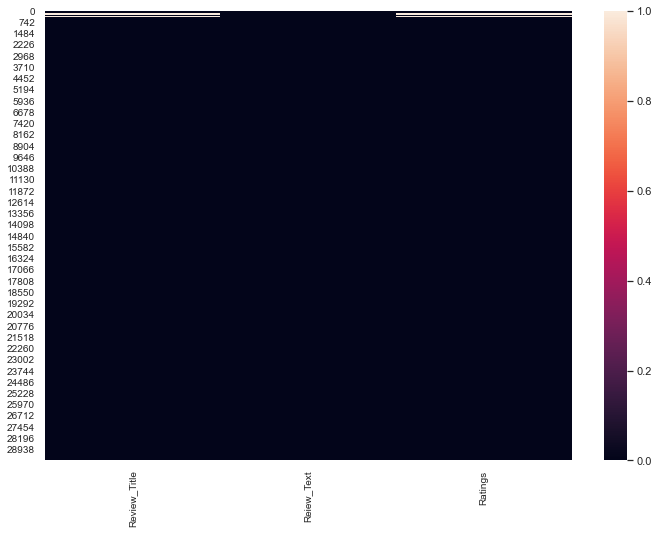

In [8]:
# Let's visualize the null values clearly in dataset using heat map
sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

Now we can clear have a look on null values by using visualization.

## Replacing nan values using imputation method:

In [9]:
#Checking the mode of Review_Title column
df["Review_Title"].mode()

0    Wonderful
dtype: object

So the highest occuring Review_Title is Wonderful, we have to replace the nan values in Review_Title column with it's mode.

In [10]:
#Checking the mode of Review_Text column
df["Reiew_Text"].mode()

0    Good
dtype: object

So the highest occuring Review_Text is Good, we have to replace the nan values in Review_Text column with it's mode.

In [11]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5                     18069
4                      5774
1                      2734
3                      1744
2                       668
5.0 out of 5 stars      147
4.0 out of 5 stars      115
1.0 out of 5 stars       82
3.0 out of 5 stars       32
2.0 out of 5 stars       21
Name: Ratings, dtype: int64

Since the highest count in Ratings column is for 5 followed by 5.0 out of 5 starts and they both are same so it is clear the mode for Ratings column is 5.

In [12]:
#Checking the mode
df["Ratings"].mode()

0    5
dtype: object

In [13]:
#Replacing naa values with there mode as all the columns are categorical
df["Review_Title"] = df["Review_Title"].fillna(df["Review_Title"].mode()[0])
df["Reiew_Text"] = df["Reiew_Text"].fillna(df["Reiew_Text"].mode()[0])
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mode()[0])

In [14]:
# Checking for null values again
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    0
Reiew_Text      0
Ratings         0
dtype: int64


Now successfully we have replaced all the nan values using imputation method.

## Let's have a look into target column:

In [15]:
# Checking the unique value count of target column
df['Ratings'].unique()

array(['1.0 out of 5 stars', '5', '2.0 out of 5 stars',
       '3.0 out of 5 stars', '5.0 out of 5 stars', '4.0 out of 5 stars',
       '4', '2', '1', '3'], dtype=object)

Looking the above entries in target column we came to know that we need to replace the string entries to there respective values(stars).

In [16]:
# Replacing the string entries in target column
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')

In [17]:
# Checking the unique value count of target column again
df['Ratings'].unique()

array([1, 5, 2, 3, 4])

Now the target column looks good for our analysis.

## Now let's combine Review_Title and Review_Text to make a single column Review:

In [18]:
# Combining Review text and title
df['Review'] = df['Review_Title'].map(str)+' '+df['Reiew_Text']

In [19]:
#let's have a look into our dataset
df

,Review_Title,Reiew_Text,Ratings,Review
0,Faulty product. Joystick/ On screen button not...,&nbsp;Picture quality and everything else is g...,1,Faulty product. Joystick/ On screen button not...
1,Terrible service by Amazon,Received the monitor with a dead pixel which I...,1,Terrible service by Amazon Received the monito...
2,Would last 6 months max!,"&nbsp;The pannel is not glued property, there ...",1,Would last 6 months max! &nbsp;The pannel is n...
3,Frame not glue properly video attached,&nbsp;monitor bottom frame not glue properly o...,1,Frame not glue properly video attached &nbsp;m...
4,Bad experience with Renewed Item,The monitor had a complete dead pixel line fro...,1,Bad experience with Renewed Item The monitor h...
...,...,...,...,...
29661,Brilliant,Super,5,Brilliant Super
29662,Delightful,Best products from Acer ..,4,Delightful Best products from Acer ..
29663,Must buy!,Full HD Monitor,5,Must buy! Full HD Monitor
29664,Really Nice,It has big border display,4,Really Nice It has big border display


Since we have obtained Review from Review_Title and Review_Text let's drop Review_Title and Review_Text. If not they'll create multicolinearity issue.

In [20]:
# Dropping unnecessary column
df.drop(columns = 'Review_Title',inplace = True)
df.drop(columns = 'Reiew_Text',inplace = True)

## Let's have a look into our Review column and see first 2 entries how the data looks:

In [21]:
# Checking data of first row in Review column
df['Review'][0]

'Faulty product. Joystick/ On screen button not working &nbsp;Picture quality and everything else is good. But got faulty product. Seems like Supplier has shipped refurbished/renewd product instead of new piece.<br><br>No option for replacement. Also return pick-up not happening within 1-2 days of registering complaint.'

In [22]:
# Checking data of second row in Review column
df['Review'][1]

'Terrible service by Amazon Received the monitor with a dead pixel which I bought during offer period at around 15K.<br>When I tried to get a replacement, Amazon guy said that they can only refund the amount and not replace the product whereas on the product screen it clearly says 7 days replacement.<br><br>What is the point of ordering during offer period now that I have to pay the full price ~ 23K to buy it again?'

By observing the Reviews we can say that there are many words, numbers, as well as punctuations which are not important for our predictions. So we need to do good text processing.

## Text Processing:

In [23]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [24]:
# Changing all words to there Lowercase
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

## Let's have a look into our text again:

In [25]:
# Checking data of first row in Review column again
df['Review'][0]

'faulty product joystick on screen button not working nbsppicture quality and everything else is good but got faulty product seems like supplier has shipped refurbishedrenewd product instead of new piece  no option for replacement also return pickup not happening within 12 days of registering complaint'

In [26]:
# Checking data of second row in Review column again
df['Review'][1]

'terrible service by amazon received the monitor with a dead pixel which i bought during offer period at around 15k when i tried to get a replacement amazon guy said that they can only refund the amount and not replace the product whereas on the product screen it clearly says 7 days replacement  what is the point of ordering during offer period now that i have to pay the full price  23k to buy it again'

Now the data looks far better than previous.And we have successfully removed punctuations and unwanted text from our text and lowercased all the text data.

## Removing StopWords:

In [27]:
# Removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [28]:
# Checking the text data again
df['Review'][0]

'faulty product joystick screen button working nbsppicture quality everything else good got faulty product seems like supplier shipped refurbishedrenewd product instead new piece option replacement also return pickup happening within 12 days registering complaint'

In [29]:
# Checking the text data again
df['Review'][1]

'terrible service amazon received monitor dead pixel bought offer period around 15k tried get replacement amazon guy said refund amount replace product whereas product screen clearly says 7 days replacement point ordering offer period pay full price 23k buy'

Now we have removed all stop words from the text data.

## Lemmatization:

In [30]:
#Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [31]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [32]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [33]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [34]:
df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [35]:
# Checking the text data again
df['Review'][0]

'faulty product joystick screen button work nbsppicture quality everything else good get faulty product seem like supplier ship refurbishedrenewd product instead new piece option replacement also return pickup happen within 12 day register complaint'

In [36]:
# Checking the text data again
df['Review'][1]

'terrible service amazon receive monitor dead pixel buy offer period around 15k tried get replacement amazon guy say refund amount replace product whereas product screen clearly say 7 day replacement point order offer period pay full price 23k buy'

So now we have removed the inflectional endings and left out with the base or dictionary form of a word.

## Text Normalization - Standardization:

In [37]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [38]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [39]:
# Checking the text data again
df['Review'][0]

'faulty product joystick screen button work nbsppicture quality everything else good get faulty product seem like supplier ship refurbishedrenewd product instead new piece option replacement also return pickup happen within  day register complaint'

In [40]:
# Checking the text data again
df['Review'][1]

'terrible service amazon receive monitor dead pixel buy offer period around k tried get replacement amazon guy say refund amount replace product whereas product screen clearly say  day replacement point order offer period pay full price k buy'

Finally I have defined a function scrub_words for removing the noise from the text. It will remove any html markups, digits and white spaces from the text.

Now We did all the text-processing steps and got required input for our model. We will get into Visualization part now.

## Visualization:

## i) Word Counts:

In [41]:
# Creating column for word counts in the text
df['Review_WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,34,faulty product joystick screen button work nbs...
1,39,terrible service amazon receive monitor dead p...
2,32,would last month max nbspthe pannel glue prop...
3,48,frame glue properly video attach nbspmonitor b...
4,22,bad experience renew item monitor complete dea...


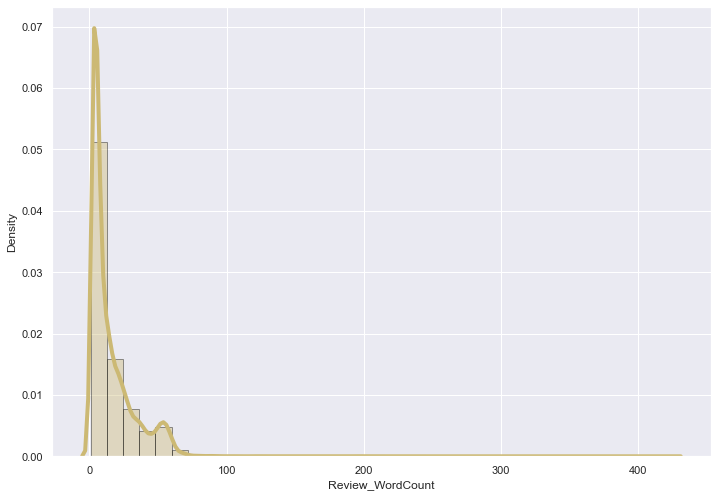

In [42]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

By observing the histogram we can clearly see that most of our text is having the number of words in the range of 0 to 80, But some of the reviews are too lengthy which may act like outliers in our data.

## ii) Character count:

In [43]:
# Creating column for character counts in the text
df['Review_ChaCount'] = df['Review'].str.len()
df[['Review_ChaCount','Review']].head()

,Review_ChaCount,Review
0,246,faulty product joystick screen button work nbs...
1,241,terrible service amazon receive monitor dead p...
2,182,would last month max nbspthe pannel glue prop...
3,343,frame glue properly video attach nbspmonitor b...
4,133,bad experience renew item monitor complete dea...


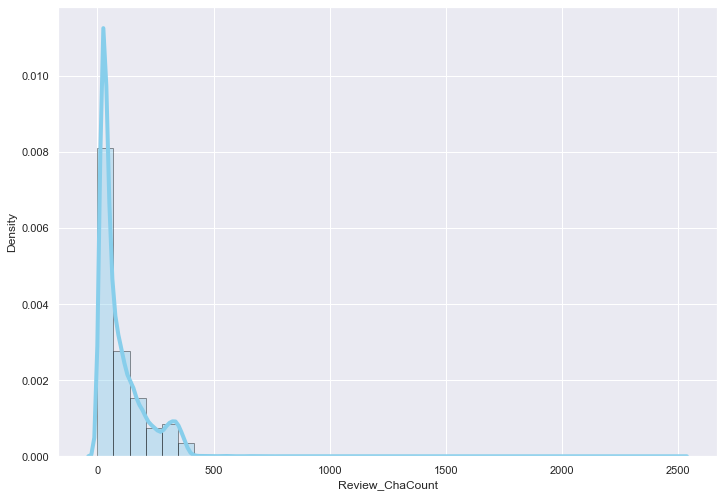

In [44]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'skyblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of Review text, which is quite similar to the histogram of word count.

## Removing Outliers:

As we know that some of the review are too lengthy, so i have to treat them as outliers and remove them using z_score method.

In [45]:
#Checking the shape of the dataset
df.shape

(29666, 4)

In [46]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(29498, 4)

In [47]:
#Checking dataloss in zscore method of test dataset
Dataloss1 = (((29666-29498)/29666)*100)
Dataloss1

0.5663048607833885

Great by removing the outliers we are loosing .566% of data which is very less and it is in acceptable range.

## Plotting histograms for word count and character counts again after removing outliers:

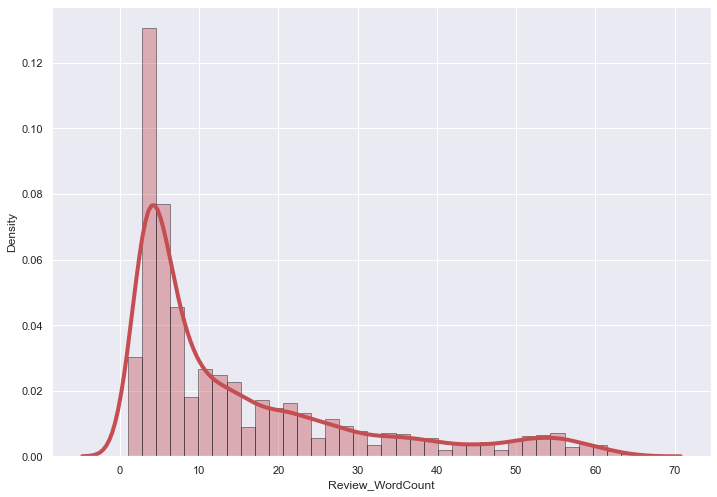

In [48]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'r',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

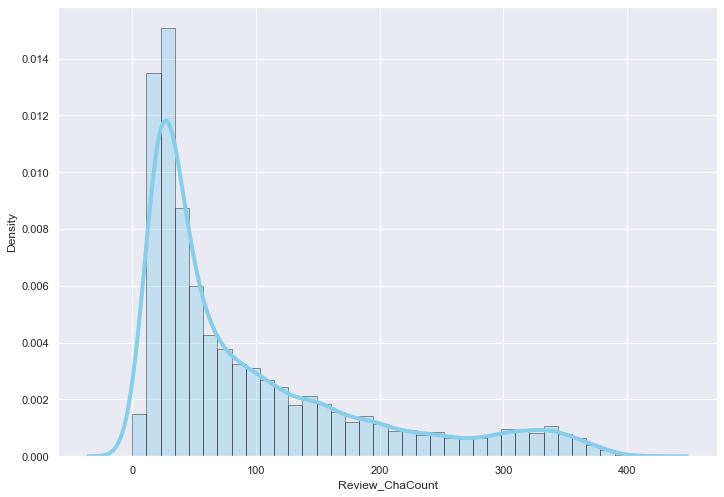

In [49]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'skyblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

After plotting histograms for word counts and character counts and after removing outliers we can see we are left out with good range of number of words and characters.

## iii) Top 30 most frequently occuring words:

In [50]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

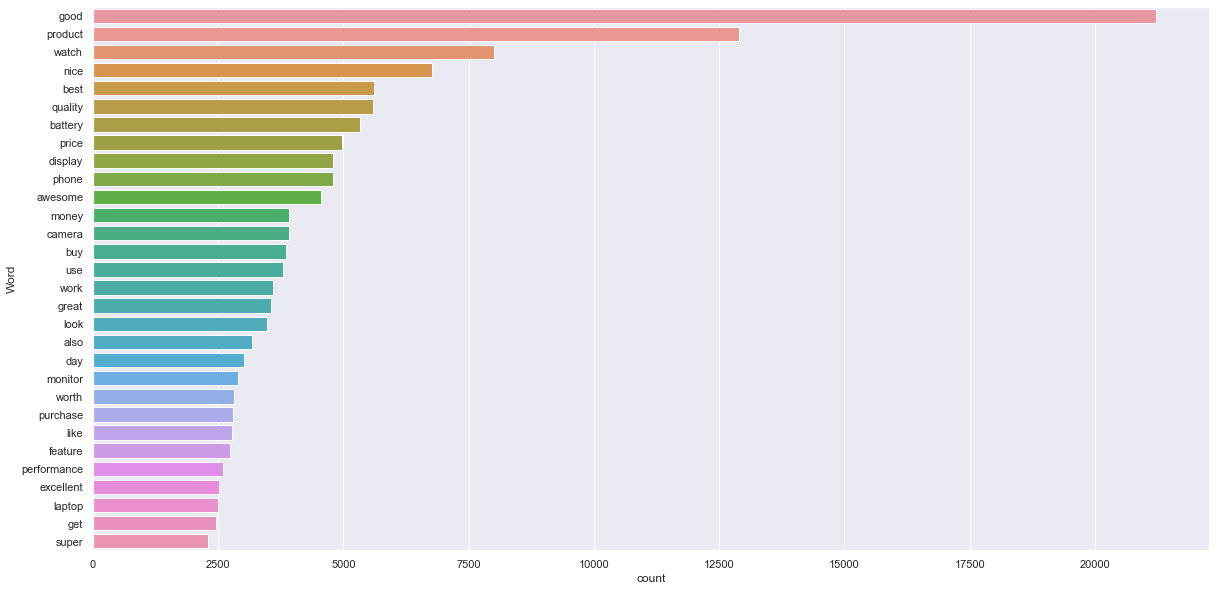

In [51]:
freq_words(df['Review'])

By seeing the above plot we can see that Good, product, watch......are occurring frequently.

## iv) Top 30 Rare words:

In [52]:
#function to plot least frequent terms
def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

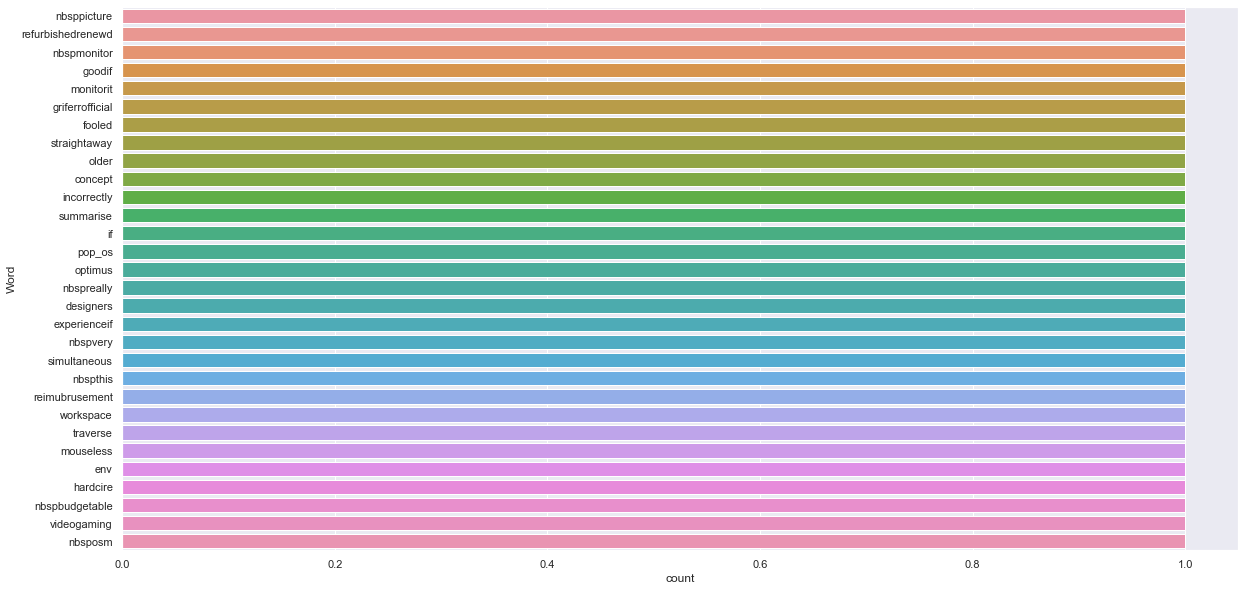

In [53]:
rare_words(df['Review'])

Above list of words are have rare occurance in Review.

## v) Word cloud:

In [54]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='pink',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

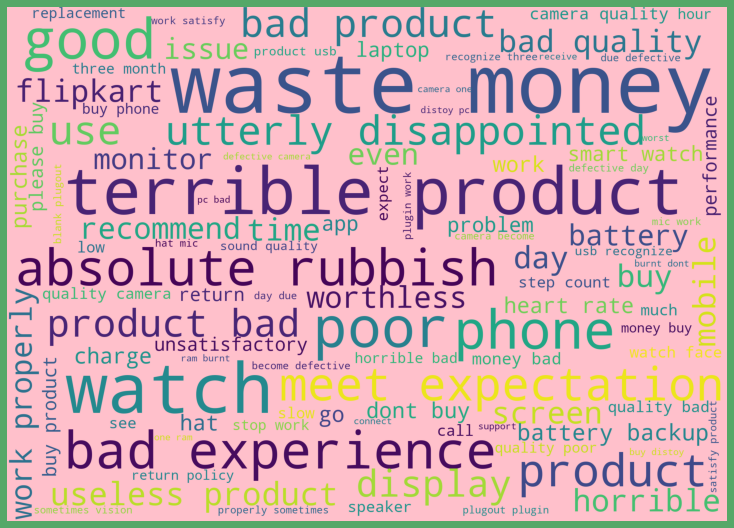

In [55]:
#Let's plot the loud words with Rating 1
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='pink',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

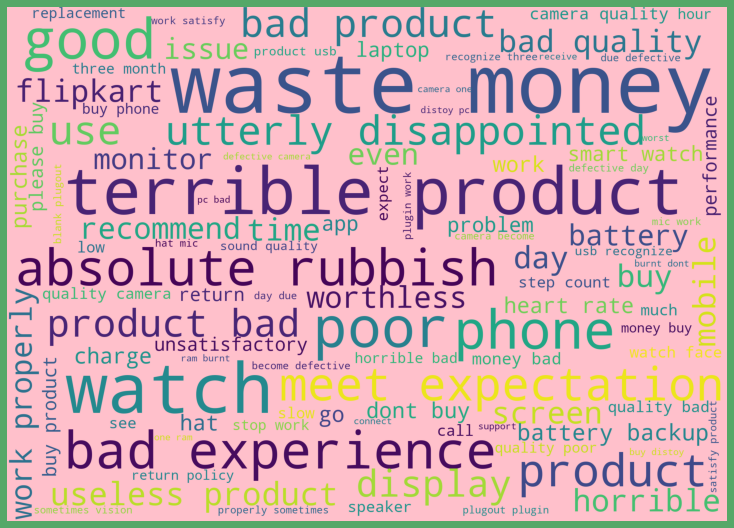

In [56]:
#Let's plot the loud words with Rating 2
from wordcloud import WordCloud

df2=df['Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='pink',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

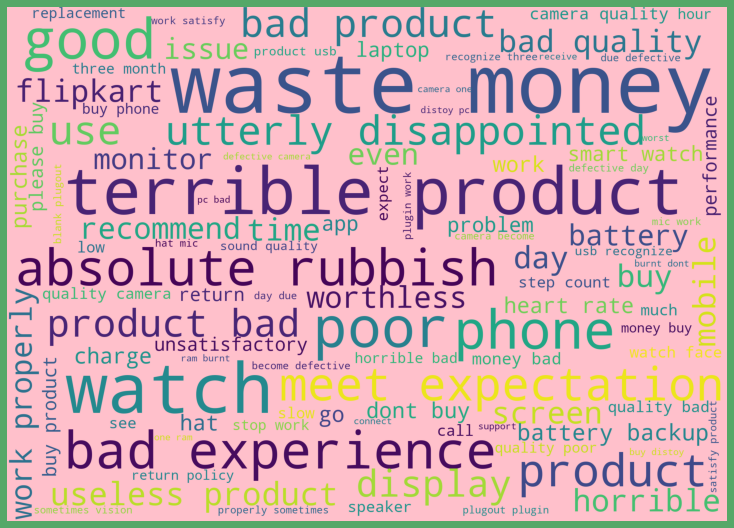

In [57]:
#Let's plot the loud words with Rating 3
from wordcloud import WordCloud

df3=df['Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='pink',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

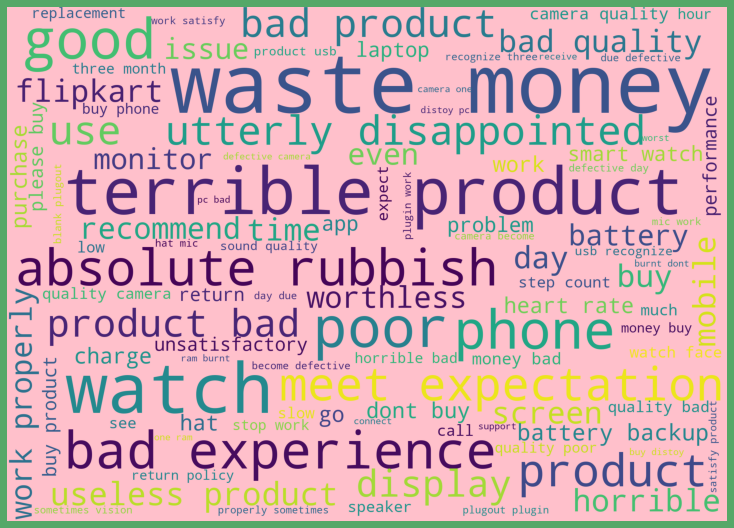

In [58]:
#Let's plot the loud words with Rating 4
from wordcloud import WordCloud

df4=df['Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='pink',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)


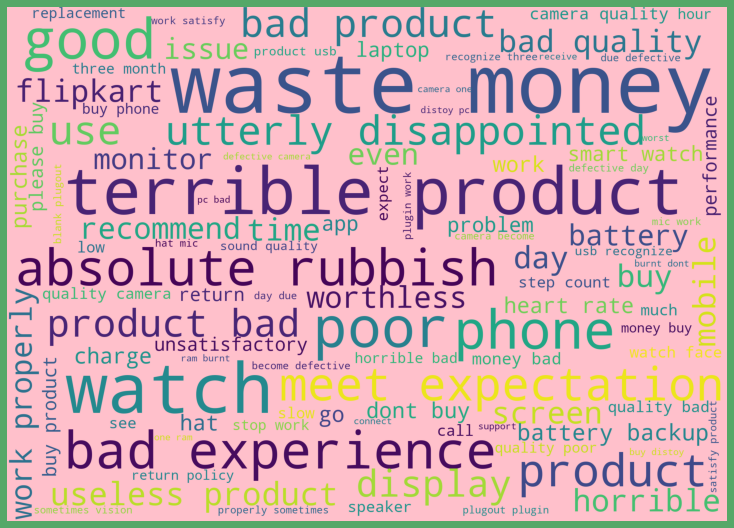

In [59]:
#Let's plot the loud words with Rating 5
from wordcloud import WordCloud

df5=df['Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='pink',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

## Observations:

In [60]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5    18400
4     5828
1     2810
3     1772
2      688
Name: Ratings, dtype: int64

## Model Building and Evaluation:

In [61]:
# Separating feature and label
x = df['Review']
y = df['Ratings']

## Converting text data into vectors using Tfidf Vectorizer:

In [62]:
#using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [63]:
#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [64]:
#I will combine both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

## Splitting the data into train and test:

In [65]:
# Splitting train and test data
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

## Data Balancing:

In [66]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (22123, 150000)
x_test (7375, 150000)
y_train (22123,)
y_test (7375,)


Now let's do oversmapling in order to make data balanced.

In [67]:
#Checking the value counts of Ratings column
y.value_counts()

5    18400
4     5828
1     2810
3     1772
2      688
Name: Ratings, dtype: int64

In [68]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 13814, 4: 4387, 1: 2087, 3: 1321, 2: 514})


So we have maximum count 13814 for 5ratings hence will over sample mannually all the ratings to the mark 13814.

In [69]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 13814, 2: 13814, 3: 13814, 4: 13814, 5: 13814})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 13814, 4: 4387, 1: 2087, 3: 1321, 2: 514})
The number of classes after fit Counter({5: 13814, 3: 13814, 4: 13814, 1: 13814, 2: 13814})


So now we have successfully balanced the data. Let's proceed with model building

In [70]:
# Importing libraries for ML Algorithms
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
# defining the algorithms
rf = RandomForestClassifier()
DTC = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
sgd = SGDClassifier()

In [72]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [73]:
# Running multiple algorithms
for model in [lr,svc,DTC,sgd,rf,mnb,bnb]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 96.8542372881356
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.98      0.98      0.98       723
           2       0.95      0.90      0.92       174
           3       0.90      0.92      0.91       451
           4       0.94      0.93      0.94      1441
           5       0.98      0.98      0.98      4586

    accuracy                           0.97      7375
   macro avg       0.95      0.94      0.95      7375
weighted avg       0.97      0.97      0.97      7375

Confusion Matrix : 
 [[ 711    3    3    2    4]
 [   2  156   12    4    0]
 [   3    1  417   20   10]
 [   1    1   27 1345   67]
 [   5    4    3   60 4514]]

******************************LinearSVC******************************
Accuracy Score: 97.00338983050848
---------------------------------------------------
CL

I have created 7 different classification algorithms. Great, among all these algorithms all are giving good accuracies.

## Cross validation score:

In [74]:
# Defning function cross_val to find cv score of models
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score :", scores)

In [76]:
for model in [lr,svc,DTC,sgd,rf,mnb,bnb]:
    cross_val(model)

******************************LogisticRegression******************************
Cross validation score : 91.87405533543895
******************************LinearSVC******************************
Cross validation score : 93.05040190988807
******************************DecisionTreeClassifier******************************
Cross validation score : 87.15509546447645
******************************SGDClassifier******************************
Cross validation score : 93.0164938359952
******************************RandomForestClassifier******************************
Cross validation score : 91.06383183101379
******************************MultinomialNB******************************
Cross validation score : 80.32751334318652
******************************BernoulliNB******************************
Cross validation score : 74.41528027139202


Great all our algorithms are giving good cv scores.Among these algorithms I am selecting SGD Classifier as best fitting algorithm for our final model as it is giving least difference between accuracy and cv score.

## HyperParameter Tuning:

In [77]:
# let's selects different parameters for tuning
grid_params = {
                'penalty':['l2','l1','elasticnet'],
                'loss':['hinge','squared_hinge'],
                'n_jobs':[-1,1]
                }

In [78]:
# Training the model with the given parameters using GridSearchCV
GCV =  GridSearchCV(sgd, grid_params, cv = 3, verbose=10)
GCV.fit(x_train_ns,y_train_ns)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 1/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.985 total time=   1.9s
[CV 2/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 2/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.987 total time=   2.0s
[CV 3/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 3/3; 1/12] END loss=hinge, n_jobs=-1, penalty=l2;, score=0.989 total time=   1.9s
[CV 1/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 1/3; 2/12] END loss=hinge, n_jobs=-1, penalty=l1;, score=0.952 total time=   5.8s
[CV 2/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 2/3; 2/12] END loss=hinge, n_jobs=-1, penalty=l1;, score=0.966 total time=   5.9s
[CV 3/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 3/3; 2/12] END loss

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'squared_hinge'], 'n_jobs': [-1, 1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=10)

In [79]:
# Printing the best parameters found by GridSearchCV
GCV.best_params_

{'loss': 'hinge', 'n_jobs': 1, 'penalty': 'l2'}

## Final Model:

In [80]:
# Training our final model with above best parameters
model = SGDClassifier(loss = 'squared_hinge', n_jobs = -1, penalty = 'l1')
model.fit(x_train_ns,y_train_ns) #fitting data to model
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100

# Printing accuracy score
print("Accuracy Score :", accuracy)

# Printing Confusion matrix
print(f"\nConfusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

# Printing Classification report
print(f"\nCLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score : 95.25423728813558

Confusion Matrix : 
 [[ 700    4    4    4   11]
 [   8  154    7    4    1]
 [  20    2  397   22   10]
 [  22    0   16 1296  107]
 [  41    2    3   62 4478]]


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.88      0.97      0.92       723
           2       0.95      0.89      0.92       174
           3       0.93      0.88      0.90       451
           4       0.93      0.90      0.92      1441
           5       0.97      0.98      0.97      4586

    accuracy                           0.95      7375
   macro avg       0.93      0.92      0.93      7375
weighted avg       0.95      0.95      0.95      7375



After hyperparameter tuning we are unable to improved our model accuracy.

## Model Saving:

In [82]:
import joblib
joblib.dump(model,"Ratings_prediction.pkl")

['Ratings_prediction.pkl']

In [83]:
model = joblib.load("Ratings_prediction.pkl")

In [87]:
prediction = model.predict(x_test)
prediction

array([2, 5, 5, ..., 5, 5, 2])

## Conclusion:

### Key findings of the study :